Робота з бібліотеками pandas, matplotlib, seaborn, а також jupyter notebook

Імпортуємо необхідні для роботи бібліотеки 

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

Зчитуємо сет даних з csv файлу та створюємо з нього датафрейм

In [3]:
df = pd.read_csv('spotify2023.csv', encoding='latin-1')

Визначаємо кількість рядків та колонок в датафреймі за допомогою властивості shape

In [4]:
print(f"Кількість рядків: {df.shape[0]}\nКількість колонок: {df.shape[1]}")

Кількість рядків: 953
Кількість колонок: 24


Знайдемо в дата сеті 10 років, в які було випущено найбільшу кількість пісень:

Для початку використаємо функцію value_counts() для підрахунку кількості унікальних значень у стовпці released_year

In [5]:
years = df['released_year'].value_counts()
years

released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64

Метод value_counts() відображає дані за зменшенням кількості входжень, тому, застосувавши метод head() 
і вказавши в якості аргументу число 10, ми отримаємо дата фрейм, який складається з 10 років, в які 
було випущено найбільшу кількість пісень

In [6]:
years = years.head(10)
years

released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
Name: count, dtype: int64

Після застосування функції value_counts() можна побачити, що в отриманому дата фреймі індекси представлені роками
Для зручності використання отриманих даних застосуємо метод reset_index(), який скине поточні індекси та 
замінить їх новими цілочисельними індексами 

In [7]:
years = years.reset_index()

Перейменуємо колонки за допомогою методу rename() для кращого розуміння отриманих результатів 

In [8]:
years.rename(columns={'released_year': 'Рік випуску', 'count': 'Кількість пісень'}, inplace=False)

,Рік випуску,Кількість пісень
0,2022,402
1,2023,175
2,2021,119
3,2020,37
4,2019,36
5,2017,23
6,2016,18
7,2014,13
8,2013,13
9,2015,11


Тепер згенеруємо для отриманих результатів графік

<Axes: title={'center': 'Кількість пісень за роком випуску'}, xlabel='Рік випуску', ylabel='Кількість пісень'>

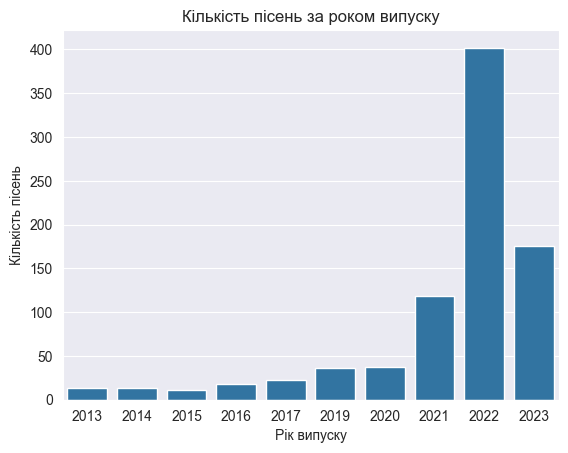

In [37]:
plt.title('Кількість пісень за роком випуску')
plt.xlabel('Рік випуску')
plt.ylabel('Кількість пісень')
sns.barplot(x='released_year', y='count', data=years)

Тепер, за таким самим принципом, знайдемо в цьому дата сеті 15 виконавців, які мають найбільшу кількість пісень:

In [10]:
artists = df['artist(s)_name'].value_counts().head(15).reset_index()
artists.rename(columns={'artist(s)_name': 'Імʼя виконавця', 'count': 'Кількість пісень'}, inplace=False)

,Імʼя виконавця,Кількість пісень
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17
5,Kendrick Lamar,12
6,Morgan Wallen,11
7,Ed Sheeran,9
8,BTS,8
9,Feid,8


Протестуємо можливість перетворення дата фрейму у словник за допомогою метода to_dict()

In [11]:
artists_dict = artists.to_dict()
print(artists_dict)

{'artist(s)_name': {0: 'Taylor Swift', 1: 'The Weeknd', 2: 'Bad Bunny', 3: 'SZA', 4: 'Harry Styles', 5: 'Kendrick Lamar', 6: 'Morgan Wallen', 7: 'Ed Sheeran', 8: 'BTS', 9: 'Feid', 10: 'Drake, 21 Savage', 11: 'Labrinth', 12: 'Olivia Rodrigo', 13: 'NewJeans', 14: 'Doja Cat'}, 'count': {0: 34, 1: 22, 2: 19, 3: 19, 4: 17, 5: 12, 6: 11, 7: 9, 8: 8, 9: 8, 10: 8, 11: 7, 12: 7, 13: 6, 14: 6}}


Протестуємо також можливість перетворення колонки дата фрейму у список
Для цього перетворимо у список колонку 'artist(s)_name' за допомогою методу tolist()

In [12]:
artists_names_list = artists['artist(s)_name'].tolist()
print(artists_names_list)

['Taylor Swift', 'The Weeknd', 'Bad Bunny', 'SZA', 'Harry Styles', 'Kendrick Lamar', 'Morgan Wallen', 'Ed Sheeran', 'BTS', 'Feid', 'Drake, 21 Savage', 'Labrinth', 'Olivia Rodrigo', 'NewJeans', 'Doja Cat']


Як у випадку з минулими результатами, згенеруємо графік

<Axes: title={'center': 'Топ виконавців'}, xlabel='Кількість пісень', ylabel='Виконавець'>

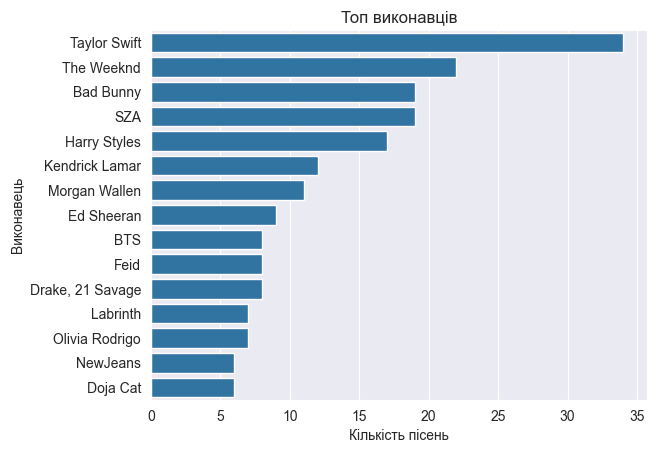

In [36]:
plt.title('Топ виконавців')
plt.xlabel('Кількість пісень')
plt.ylabel('Виконавець')
sns.barplot(x='count', y='artist(s)_name', data=artists)

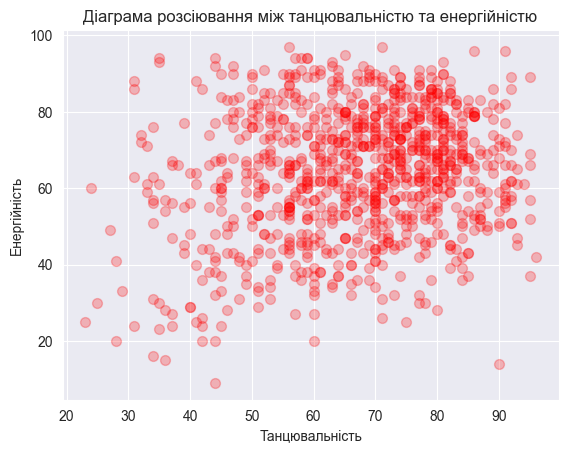

In [35]:
plt.scatter(df['danceability_%'], df['energy_%'], color='red', alpha=0.25, s=50)
plt.title('Діаграма розсіювання між танцювальністю та енергійністю')
plt.xlabel('Танцювальність')
plt.ylabel('Енергійність')
plt.grid(True)
plt.show()